In [1]:
# In this notebook, we will evaluate the results from the fully conv compression ratio experiments


In [2]:

import pathlib
import logging
logging.basicConfig(level=logging.INFO)

from src.eval_utils import *
from notebooks.ai_thermal_fluids_2025.eval_functions import *

#base_output_dir = pathlib.Path('/Volumes/My Passport for Mac/Multiphase-ae/lassen_output')
base_dir = pathlib.Path('../../output/lassen')
files = list(base_dir.glob('interfacial_ae_v31_*'))

print(len(files))

168


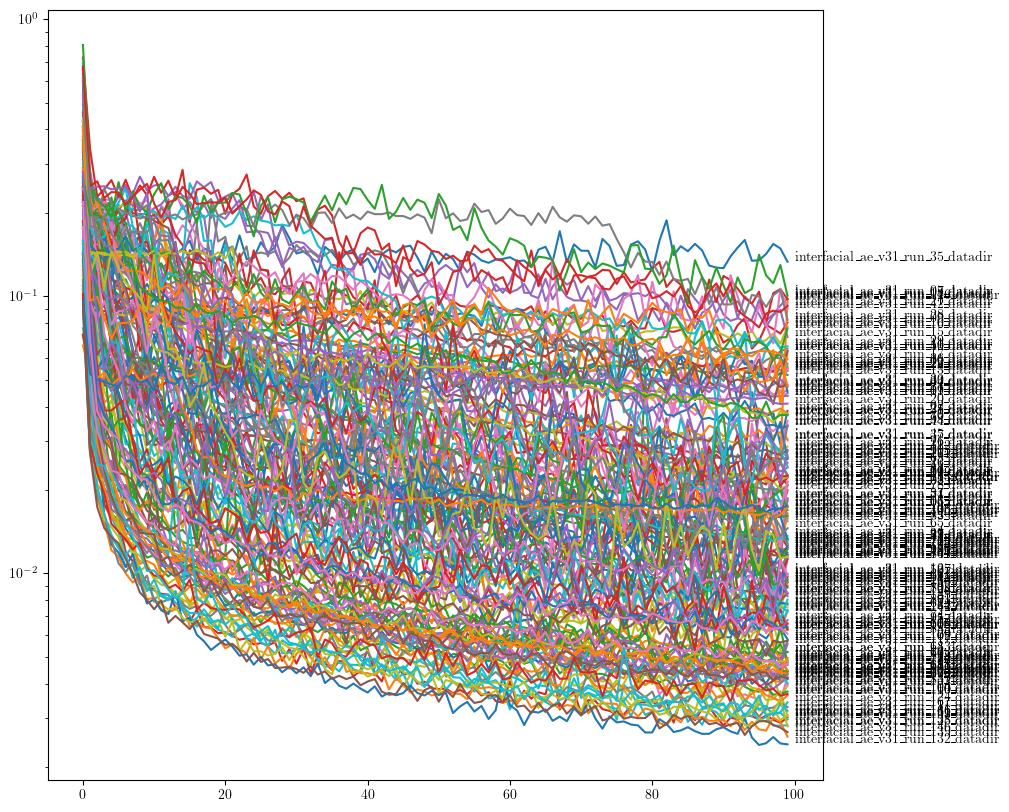

In [3]:
# Compare all the loss curves on one axis

name_to_loss = {}

for f in files:
    try:
        additional_dirs = 'usr/workspace/cutforth1/datamfae/spheres*/*'
        results_dir = list(f.glob(additional_dirs))[0]
        name_to_loss[f] = read_loss_curve_from_file(results_dir)
    except:
        print(f'Could not read {results_dir}')

fig, ax = plt.subplots(figsize=(10, 10))
loss_component = 'Total'
for f, loss in name_to_loss.items():
    ax.plot(loss[loss_component], label=f.name)

    # Annotate name on the end of the curve
    ax.text(len(loss[loss_component]), loss[loss_component][-1], f.name)
#ax.legend()
ax.set_yscale('log')
plt.show()



In [4]:

def extract_interface_type(outdir):
    final_part = '_'.join(outdir.stem.split('_')[:-2])
    #final_part = final_part.replace('datadir', '')

    str_to_type = {
        'TANH_EPSILON00078125': InterfaceType.TANH_EPSILON,
        'TANH_EPSILON0015625': InterfaceType.TANH_EPSILON,
        'TANH_EPSILON003125': InterfaceType.TANH_EPSILON,
        'TANH_EPSILON00625': InterfaceType.TANH_EPSILON,
        'TANH_EPSILON0125': InterfaceType.TANH_EPSILON,
        'TANH_EPSILON025': InterfaceType.TANH_EPSILON,
        'HEAVISIDE': InterfaceType.HEAVISIDE,
        'SIGNED_DISTANCE_EXACT': InterfaceType.SIGNED_DISTANCE_EXACT,
        'SIGNED_DISTANCE_APPROXIMATE': InterfaceType.SIGNED_DISTANCE_APPROXIMATE,
    }

    return str_to_type[final_part]

def extract_epsilon(outdir):
    final_part = '_'.join(outdir.stem.split('_')[:-2])

    str_to_epsilon = {
        'TANH_EPSILON00078125': 0.0078125,
        'TANH_EPSILON0015625': 0.015625,
        'TANH_EPSILON003125': 0.03125,
        'TANH_EPSILON00625': 0.0625,
        'TANH_EPSILON0125': 0.125,
        'TANH_EPSILON025': 0.25,
        'HEAVISIDE': None,
        'SIGNED_DISTANCE_EXACT': None,
        'SIGNED_DISTANCE_APPROXIMATE': None,
    }

    return str_to_epsilon[final_part]

def get_dataset_path(mu, interfacetype, epsilon):
    if interfacetype == InterfaceType.TANH_EPSILON:
        return pathlib.Path(f'/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/src/preprocessing/data/mu_spheres/spheres_mu_{mu:.2f}/TANH_EPSILON{epsilon}')
    elif interfacetype == InterfaceType.HEAVISIDE:
        return pathlib.Path(f'/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/src/preprocessing/data/mu_spheres/spheres_mu_{mu:.2f}/HEAVISIDE')
    elif interfacetype == InterfaceType.SIGNED_DISTANCE_EXACT:
        return pathlib.Path(f'/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/src/preprocessing/data/mu_spheres/spheres_mu_{mu:.2f}/SIGNED_DISTANCE_EXACT')
    elif interfacetype == InterfaceType.SIGNED_DISTANCE_APPROXIMATE:
        return pathlib.Path(f'/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/src/preprocessing/data/mu_spheres/spheres_mu_{mu:.2f}/SIGNED_DISTANCE_APPROXIMATE')
    else:
        raise ValueError('Unknown interface type')

def extract_mu(outdir):
    mid_part = outdir.parent.name.split('_')[-1]

    if mid_part == '100':
        return 1.0
    elif mid_part == '200':
        return 2.0
    elif mid_part == '250':
        return 2.5
    else:
        raise ValueError(f'Unknown mu type from {mid_part}, {outdir}')

In [5]:
outdir_to_params = {}

for outdir in files:
    additional_dirs = 'usr/workspace/cutforth1/datamfae/spheres*/*'
    results_dir = list(outdir.glob(additional_dirs))[0]
    print(results_dir.stem.split('_'))

    interfacetype = extract_interface_type(results_dir)
    epsilon = extract_epsilon(results_dir)
    mu = extract_mu(results_dir)
    model_path = get_model_path(results_dir, epoch=100)
    dim_mults = get_dim_mults(results_dir)
    dataset_path = get_dataset_path(mu, interfacetype, epsilon)
    max_train_samples = get_max_train_samples(results_dir)

    if not model_path.exists():
        continue

    assert model_path.exists(), f'{model_path} does not exist'
    assert dataset_path.exists(), f'{dataset_path} does not exist'
   
    params = {
       'interface_type': interfacetype,
        'mu': mu,
       'epsilon': epsilon,
       'model_path': model_path,
       'dataset_path': dataset_path,
       'dim_mults': dim_mults,
        'max_train_samples': max_train_samples,
    }
   
    outdir_to_params[outdir] = params
    
print(outdir_to_params)

['TANH', 'EPSILON0015625', 'seed4', 'maxtrainsamples200']
['HEAVISIDE', 'seed4', 'maxtrainsamples2000']
['HEAVISIDE', 'seed4', 'maxtrainsamples200']
['TANH', 'EPSILON00078125', 'seed4', 'maxtrainsamples1600']
['TANH', 'EPSILON0125', 'seed4', 'maxtrainsamples800']
['SIGNED', 'DISTANCE', 'EXACT', 'seed4', 'maxtrainsamples50']
['TANH', 'EPSILON0015625', 'seed4', 'maxtrainsamples400']
['TANH', 'EPSILON003125', 'seed4', 'maxtrainsamples2000']
['TANH', 'EPSILON003125', 'seed4', 'maxtrainsamples400']
['TANH', 'EPSILON00625', 'seed4', 'maxtrainsamples2000']
['SIGNED', 'DISTANCE', 'EXACT', 'seed4', 'maxtrainsamples200']
['HEAVISIDE', 'seed4', 'maxtrainsamples1600']
['TANH', 'EPSILON025', 'seed4', 'maxtrainsamples800']
['TANH', 'EPSILON025', 'seed4', 'maxtrainsamples200']
['SIGNED', 'DISTANCE', 'EXACT', 'seed4', 'maxtrainsamples1600']
['SIGNED', 'DISTANCE', 'EXACT', 'seed4', 'maxtrainsamples800']
['TANH', 'EPSILON00078125', 'seed4', 'maxtrainsamples50']
['TANH', 'EPSILON003125', 'seed4', 'maxtra

In [6]:
# Run inference for all
k = 0
for outdir, params in outdir_to_params.items():
    k += 1
    print('=' * 64)
    print(f"Dir {k} of {len(outdir_to_params)}")
    print('=' * 64)

    outfile = outdir / 'inference.npz'

    if outfile.exists():
        continue

    dataset = load_dataset(params['dataset_path'], max_num_samples=25_000)
    model = load_model(params['model_path'], dim_mults=params['dim_mults'])
    gts, preds = run_inference(dataset, model, N=50)
    
    # Save outdir, preds, params, gt to disk, ready to be reloaded at evaluation time!
    
    np.savez_compressed(outfile, gts=gts, preds=preds, **params)

Dir 1 of 168
Dir 2 of 168
Dir 3 of 168
Dir 4 of 168
Dir 5 of 168
Dir 6 of 168
Dir 7 of 168
Dir 8 of 168
Dir 9 of 168
Dir 10 of 168
Dir 11 of 168
Dir 12 of 168
Dir 13 of 168
Dir 14 of 168
Dir 15 of 168
Dir 16 of 168
Dir 17 of 168
Dir 18 of 168
Dir 19 of 168
Dir 20 of 168
Dir 21 of 168
Dir 22 of 168
Dir 23 of 168
Dir 24 of 168
Dir 25 of 168
Dir 26 of 168
Dir 27 of 168
Dir 28 of 168
Dir 29 of 168
Dir 30 of 168
Dir 31 of 168
Dir 32 of 168
Dir 33 of 168
Dir 34 of 168
Dir 35 of 168
Dir 36 of 168
Dir 37 of 168
Dir 38 of 168
Dir 39 of 168
Dir 40 of 168
Dir 41 of 168
Dir 42 of 168
Dir 43 of 168
Dir 44 of 168
Dir 45 of 168
Dir 46 of 168
Dir 47 of 168
Dir 48 of 168
Dir 49 of 168
Dir 50 of 168
Dir 51 of 168
Dir 52 of 168
Dir 53 of 168
Dir 54 of 168
Dir 55 of 168
Dir 56 of 168
Dir 57 of 168
Dir 58 of 168
Dir 59 of 168
Dir 60 of 168
Dir 61 of 168
Dir 62 of 168
Dir 63 of 168
Dir 64 of 168
Dir 65 of 168
Dir 66 of 168
Dir 67 of 168
Dir 68 of 168
Dir 69 of 168
Dir 70 of 168
Dir 71 of 168
Dir 72 of 168
D

In [7]:
# Go over each file, and load predictions, compute metrics from each volume

outdir_to_metrics = {}

for outdir, params in outdir_to_params.items():
    print(outdir)
    outfile = outdir / 'inference.npz'
    data = np.load(outfile)
    
    gts = data['gts']
    preds = data['preds']
    
    # Convert to sharp interface
    interfacetype = params['interface_type']
    
    # Compute metrics
    # 2. Dice coefficient
    
    dices = []
    
    for gt, pred in zip(gts, preds):
        gt = get_phi_sharp(gt, interfacetype)
        pred = get_phi_sharp(pred, interfacetype)
        
        dice = dice_coefficient(gt, pred)
        dices.append(dice)
        
    print(np.mean(dices))
        
    outdir_to_metrics[outdir] = {
        'Dice': dices,
    }
    

../../output/lassen/interfacial_ae_v31_run_79_datadir
0.9570332439169869
../../output/lassen/interfacial_ae_v31_run_69_datadir
0.9753906511193905
../../output/lassen/interfacial_ae_v31_run_121_datadir
0.9460924739558131
../../output/lassen/interfacial_ae_v31_run_131_datadir
0.9813065227900853
../../output/lassen/interfacial_ae_v31_run_46_datadir
0.6097490381166555
../../output/lassen/interfacial_ae_v31_run_56_datadir
0.7262757831841943
../../output/lassen/interfacial_ae_v31_run_24_datadir
0.6913657987629186
../../output/lassen/interfacial_ae_v31_run_34_datadir
0.6659902344263529
../../output/lassen/interfacial_ae_v31_run_143_datadir
0.9652804966009976
../../output/lassen/interfacial_ae_v31_run_153_datadir
0.9843051425252743
../../output/lassen/interfacial_ae_v31_run_02_datadir
0.4044663185530667
../../output/lassen/interfacial_ae_v31_run_12_datadir
0.7350609730337471
../../output/lassen/interfacial_ae_v31_run_165_datadir
0.9664000527326896
../../output/lassen/interfacial_ae_v31_run_107

In [8]:
import pickle

with open('output/trainsize_synthetic_outdir_to_params.pkl', 'wb') as f:
    pickle.dump(outdir_to_params, f)

with open('output/trainsize_synthetic_outdir_to_metrics.pkl', 'wb') as f:
    pickle.dump(outdir_to_metrics, f)


In [7]:
import pickle

with open('output/trainsize_synthetic_outdir_to_params.pkl', 'rb') as f:
    outdir_to_params = pickle.load(f)

with open('output/trainsize_synthetic_outdir_to_metrics.pkl', 'rb') as f:
    outdir_to_metrics = pickle.load(f)


/var/folders/6y/1gfy1yb96_59763zctgly20h0000gn/T/ipykernel_47940/856825632.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', len(tanh_labels))


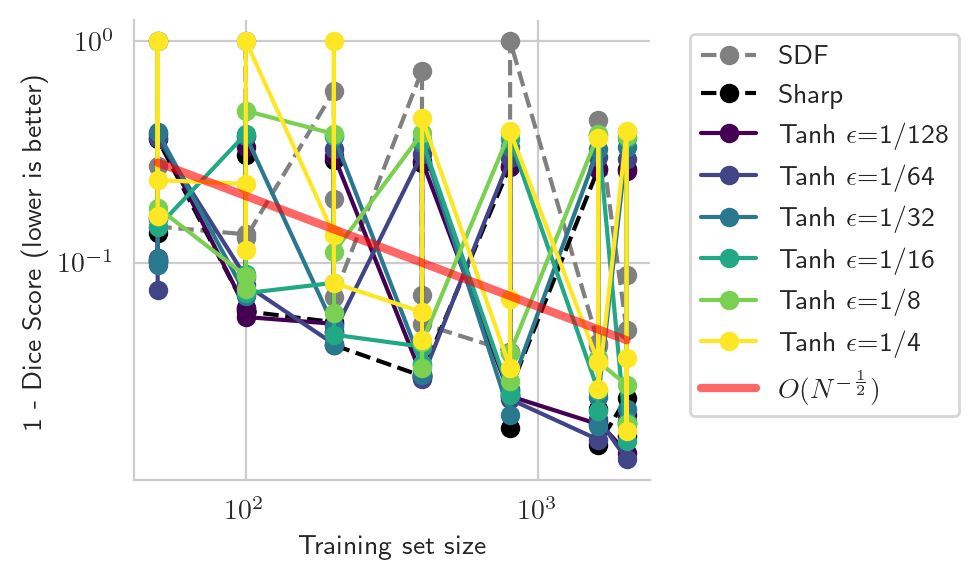

In [10]:

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from collections import defaultdict
from fractions import Fraction

# This helper function is from your original code
def float_to_fraction(float_num):
    fraction = Fraction(float_num).limit_denominator()
    return f"{fraction.numerator}/{fraction.denominator}"

# 1. Restructure the data for the new plot
# We want to group by interface type, and for each type, have a list of (num_samples, dice_scores)
plot_data = defaultdict(list)

for outdir, params in outdir_to_params.items():
    # Generate the label for the interface type, same as before
    interface_type = params['interface_type']
    epsilon = params['epsilon']

    if interface_type == InterfaceType.TANH_EPSILON:
        label = f'Tanh $\\epsilon$={float_to_fraction(epsilon)}'
    elif interface_type == InterfaceType.SIGNED_DISTANCE_EXACT:
        label = 'SDF'
    else: # Heaviside
        label = 'Sharp'

    # Get the data points for this experiment
    num_samples = params['max_train_samples']
    dice_scores = outdir_to_metrics[outdir]['Dice']

    # Store the number of samples and the raw dice scores for this run
    plot_data[label].append((num_samples, dice_scores))

# 2. Prepare for plotting: sort data points and assign colors
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=200)

# Separate labels to control color mapping and plotting order
tanh_labels = sorted([l for l in plot_data if l.startswith('Tanh')],
                     key=lambda l: float(eval(l.split('=')[-1])))
other_labels = sorted([l for l in plot_data if not l.startswith('Tanh')])

# Create a viridis colormap for the Tanh lines
viridis = cm.get_cmap('viridis', len(tanh_labels))
colors = {label: viridis(i) for i, label in enumerate(tanh_labels)}
styles = {label: '-' for label in tanh_labels}

# Assign specific colors for other interface types
for label in other_labels:
    styles[label] = '--'
    if label == 'SDF':
        colors[label] = 'gray' # Blue
    elif label == 'Sharp':
        colors[label] = 'black' # Orange
    else:
        raise ValueError(f'Unknown label {label}')

# 3. Generate the plot
# Plot other types first, then Tanh types on top
for label in other_labels + tanh_labels:
    # Sort the data points by the number of samples for correct line plotting
    sorted_data = sorted(plot_data[label], key=lambda x: x[0])

    x_samples = [item[0] for item in sorted_data]
    y_dices_list = [item[1] for item in sorted_data]
    y_mean = [1.0 - np.mean(dices) for dices in y_dices_list]
    ax.loglog(x_samples, y_mean, marker='o', linestyle=styles[label], label=label, color=colors[label])


# Add convergence rate line
xs = np.array(x_samples[:-2], dtype=float)
ys = 2.0 * xs ** (-0.5)
ax.loglog(xs, ys, linestyle='-', lw=3, color='red', alpha=0.6, label='$O(N^{-\\frac{1}{2}})$')

# 4. Finalize plot aesthetics
ax.set_xlabel('Training set size')
ax.set_ylabel('1 - Dice Score (lower is better)')
#ax.set_title('Model Performance vs. Training Data Size by Interface Type')
#ax.set_ylim(bottom=0.85, top=1.0) # Adjust ylim to focus on the relevant range
ax.set_yscale('log')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for the legend

plt.savefig("output/trainsize_hit.pdf")

plt.show()


/var/folders/6y/1gfy1yb96_59763zctgly20h0000gn/T/ipykernel_47940/2752555900.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', len(tanh_labels))


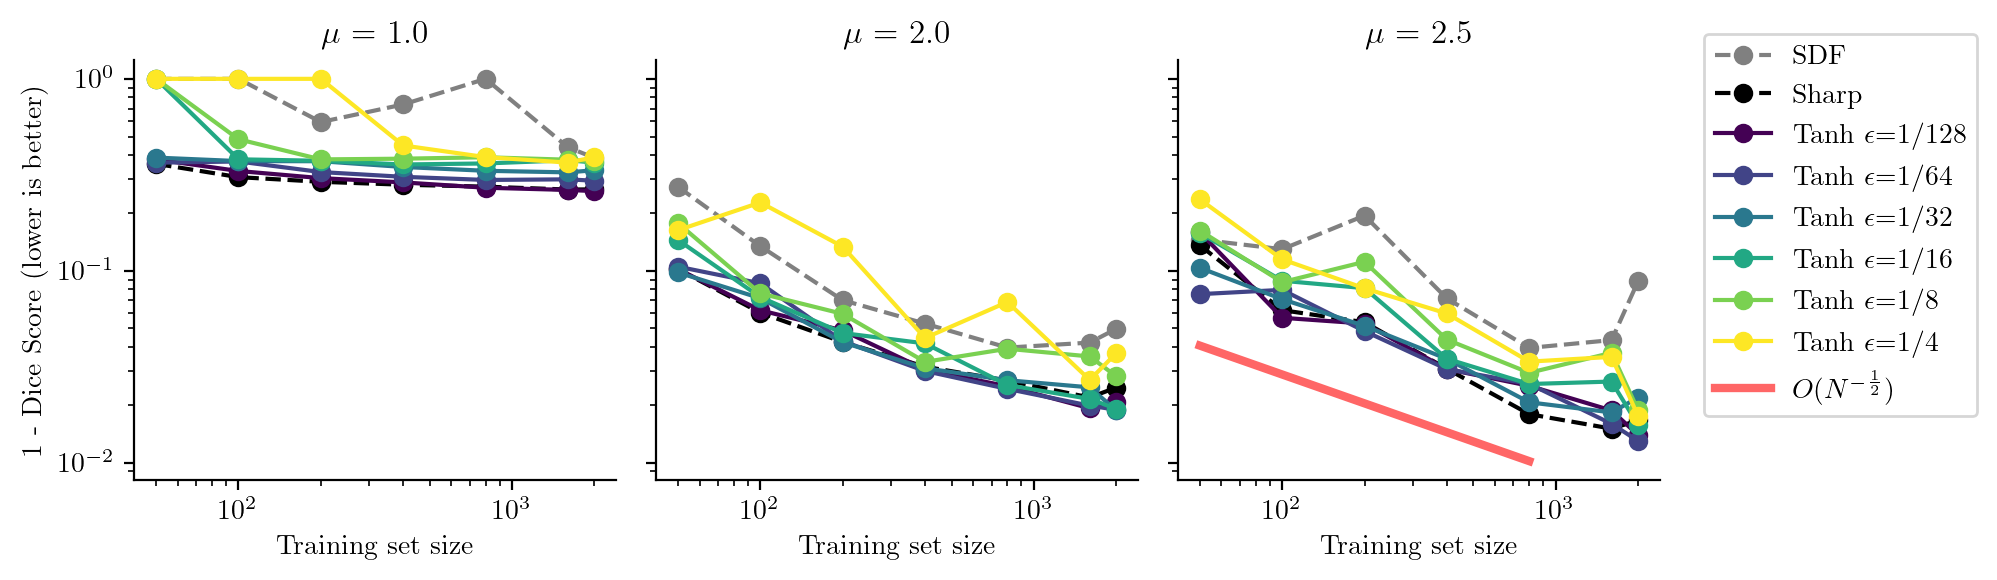

In [28]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from collections import defaultdict
from fractions import Fraction

plt.rcdefaults()
matplotlib.rc_file_defaults()


# This helper function is from your original code
def float_to_fraction(float_num):
    fraction = Fraction(float_num).limit_denominator()
    return f"{fraction.numerator}/{fraction.denominator}"

# 1. Restructure the data for the new plot
# We group by mu, then by interface type label.
# defaultdict(lambda: defaultdict(list)) creates a dict where each value is another dict.
plot_data = defaultdict(lambda: defaultdict(list))

for outdir, params in outdir_to_params.items():
    # Get the mu value for the top-level grouping
    mu = params['mu']

    # Generate the label for the interface type, same as before
    interface_type = params['interface_type']
    epsilon = params['epsilon']

    if interface_type == InterfaceType.TANH_EPSILON:
        label = f'Tanh $\\epsilon$={float_to_fraction(epsilon)}'
    elif interface_type == InterfaceType.SIGNED_DISTANCE_EXACT:
        label = 'SDF'
    else: # Heaviside
        label = 'Sharp'

    # Get the data points for this experiment
    num_samples = params['max_train_samples']
    dice_scores = outdir_to_metrics[outdir]['Dice']

    # Store the data grouped by mu, then by label
    plot_data[mu][label].append((num_samples, dice_scores))


# 2. Prepare for plotting: define labels, colors, and styles
# These definitions should be global for the whole figure to ensure consistency
all_labels = set(label for mu_data in plot_data.values() for label in mu_data.keys())

tanh_labels = sorted([l for l in all_labels if l.startswith('Tanh')],
                     key=lambda l: float(eval(l.split('=')[-1])))
other_labels = sorted([l for l in all_labels if not l.startswith('Tanh')])

# Create a viridis colormap for the Tanh lines
viridis = cm.get_cmap('viridis', len(tanh_labels))
colors = {label: viridis(i) for i, label in enumerate(tanh_labels)}
styles = {label: '-' for label in tanh_labels}

# Assign specific colors and styles for other interface types
for label in other_labels:
    styles[label] = '--'
    if label == 'SDF':
        colors[label] = 'gray'
    elif label == 'Sharp':
        colors[label] = 'black'
    else:
        raise ValueError(f'Unknown label {label}')


# 3. Generate the panel plot
mu_values = sorted(plot_data.keys())
fig, axes = plt.subplots(1, len(mu_values), figsize=(10, 3), dpi=200, sharey=True)

# Ensure 'axes' is always a list, even if there's only one subplot
if len(mu_values) == 1:
    axes = [axes]

# Loop through each mu value and its corresponding subplot axis
for i, mu in enumerate(mu_values):
    ax = axes[i]
    current_mu_data = plot_data[mu]

    # Plot each interface type for the current mu
    for label in other_labels + tanh_labels:
        # Check if this label exists for the current mu value
        if label in current_mu_data:
            # Sort the data points by the number of samples for correct line plotting
            sorted_data = sorted(current_mu_data[label], key=lambda x: x[0])

            x_samples = [item[0] for item in sorted_data]
            y_dices_list = [item[1] for item in sorted_data]
            y_mean = [1.0 - np.mean(dices) for dices in y_dices_list]
            ax.loglog(x_samples, y_mean, marker='o', linestyle=styles[label], label=label, color=colors[label])

    # Add convergence rate line to each subplot
    # Use the x-axis from the last plotted line for reference
    if 'x_samples' in locals() and len(x_samples) > 2 and i == 2:
        xs = np.array(x_samples[:-2], dtype=float)
        # We may need to scale the convergence line to fit the data in each panel
        # Here we scale it by the first y-point of the 'Sharp' curve if available
        ys_scale = 1.0 # default scale
        if 'Sharp' in current_mu_data:
            sharp_data = sorted(current_mu_data['Sharp'], key=lambda x: x[0])
            if sharp_data:
                first_y = 1.0 - np.mean(sharp_data[0][1])
                first_x = sharp_data[0][0]
                ys_scale = first_y / (first_x ** -0.5)

        ys = (ys_scale * 0.3) * xs ** (-0.5)
        ax.loglog(xs, ys, linestyle='-', lw=3, color='red', alpha=0.6, label='$O(N^{-\\frac{1}{2}})$')


    # 4. Finalize aesthetics for each subplot
    ax.set_title(f'$\\mu$ = {mu}')
    ax.set_xlabel('Training set size')
    ax.set_yscale('log')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the shared y-axis label only on the first plot
axes[0].set_ylabel('1 - Dice Score (lower is better)')

# 5. Create a single, unified legend for the entire figure
handles, labels = axes[-1].get_legend_handles_labels() # Get handles from the last plot
fig.legend(handles, labels, bbox_to_anchor=(0.85, 0.95), loc='upper left')

# Adjust layout to make space for the legend on the right
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.savefig("output/trainsize_synthetic_panels.pdf")

plt.show()

/var/folders/6y/1gfy1yb96_59763zctgly20h0000gn/T/ipykernel_74768/2124823306.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', len(tanh_labels))


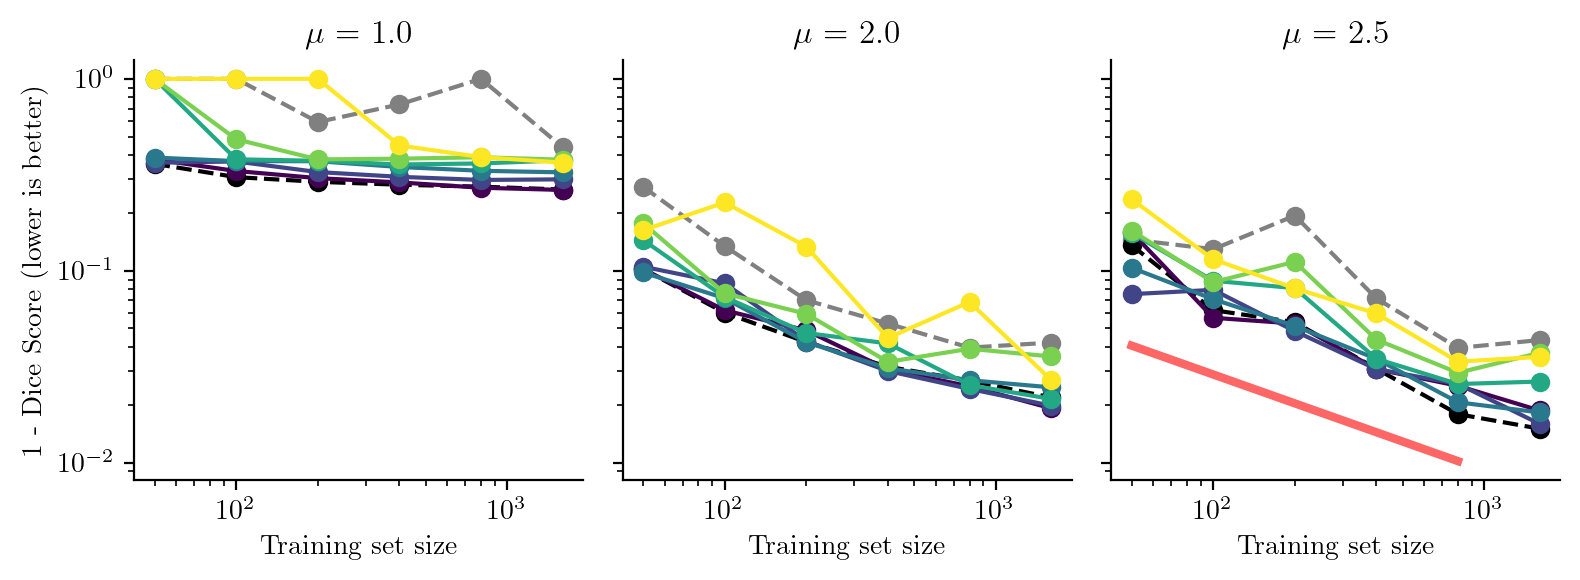

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from collections import defaultdict
from fractions import Fraction

plt.rcdefaults()
matplotlib.rc_file_defaults()


# 1. Restructure the data for the new plot
# We group by mu, then by interface type label.
# defaultdict(lambda: defaultdict(list)) creates a dict where each value is another dict.
plot_data = defaultdict(lambda: defaultdict(list))

for outdir, params in outdir_to_params.items():
    # Get the mu value for the top-level grouping
    mu = params['mu']

    # Generate the label for the interface type, same as before
    interface_type = params['interface_type']
    epsilon = params['epsilon']

    if interface_type == InterfaceType.TANH_EPSILON:
        label = f'Tanh $\\epsilon$={float_to_fraction(epsilon)}'
    elif interface_type == InterfaceType.SIGNED_DISTANCE_EXACT:
        label = 'SDF'
    else: # Heaviside
        label = 'Sharp'

    # Get the data points for this experiment
    num_samples = params['max_train_samples']
    dice_scores = outdir_to_metrics[outdir]['Dice']

    # Store the data grouped by mu, then by label
    plot_data[mu][label].append((num_samples, dice_scores))


# 2. Prepare for plotting: define labels, colors, and styles
# These definitions should be global for the whole figure to ensure consistency
all_labels = set(label for mu_data in plot_data.values() for label in mu_data.keys())

tanh_labels = sorted([l for l in all_labels if l.startswith('Tanh')],
                     key=lambda l: float(eval(l.split('=')[-1])))
other_labels = sorted([l for l in all_labels if not l.startswith('Tanh')])

# Create a viridis colormap for the Tanh lines
viridis = cm.get_cmap('viridis', len(tanh_labels))
colors = {label: viridis(i) for i, label in enumerate(tanh_labels)}
styles = {label: '-' for label in tanh_labels}

# Assign specific colors and styles for other interface types
for label in other_labels:
    styles[label] = '--'
    if label == 'SDF':
        colors[label] = 'gray'
    elif label == 'Sharp':
        colors[label] = 'black'
    else:
        raise ValueError(f'Unknown label {label}')


# 3. Generate the panel plot
mu_values = sorted(plot_data.keys())
fig, axes = plt.subplots(1, len(mu_values), figsize=(8, 3), dpi=200, sharey=True)

# Ensure 'axes' is always a list, even if there's only one subplot
if len(mu_values) == 1:
    axes = [axes]

# Loop through each mu value and its corresponding subplot axis
for i, mu in enumerate(mu_values):
    ax = axes[i]
    current_mu_data = plot_data[mu]

    # Plot each interface type for the current mu
    for label in other_labels + tanh_labels:
        # Check if this label exists for the current mu value
        if label in current_mu_data:
            # Sort the data points by the number of samples for correct line plotting
            sorted_data = sorted(current_mu_data[label], key=lambda x: x[0])

            x_samples = [item[0] for item in sorted_data]
            y_dices_list = [item[1] for item in sorted_data]
            y_mean = [1.0 - np.mean(dices) for dices in y_dices_list]
            ax.loglog(x_samples[:-1], y_mean[:-1], marker='o', linestyle=styles[label], label=label, color=colors[label])

    # Add convergence rate line to each subplot
    # Use the x-axis from the last plotted line for reference
    if 'x_samples' in locals() and len(x_samples) > 2 and i == 2:
        xs = np.array(x_samples[:-2], dtype=float)
        # We may need to scale the convergence line to fit the data in each panel
        # Here we scale it by the first y-point of the 'Sharp' curve if available
        ys_scale = 1.0 # default scale
        if 'Sharp' in current_mu_data:
            sharp_data = sorted(current_mu_data['Sharp'], key=lambda x: x[0])
            if sharp_data:
                first_y = 1.0 - np.mean(sharp_data[0][1])
                first_x = sharp_data[0][0]
                ys_scale = first_y / (first_x ** -0.5)

        ys = (ys_scale * 0.3) * xs ** (-0.5)
        ax.loglog(xs, ys, linestyle='-', lw=3, color='red', alpha=0.6, label='$O(N^{-\\frac{1}{2}})$')


    # 4. Finalize aesthetics for each subplot
    ax.set_title(f'$\\mu$ = {mu}')
    ax.set_xlabel('Training set size')
    ax.set_yscale('log')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the shared y-axis label only on the first plot
axes[0].set_ylabel('1 - Dice Score (lower is better)')

# 5. Create a single, unified legend for the entire figure
#handles, labels = axes[-1].get_legend_handles_labels() # Get handles from the last plot
#fig.legend(handles, labels, bbox_to_anchor=(0.85, 0.95), loc='upper left')

# Adjust layout to make space for the legend on the right
plt.tight_layout(rect=[0, 0, 1, 1])

plt.savefig("output/trainsize_synthetic_panels_no_legend.pdf")

plt.show()